# Analyzing and deriving insights from the Call_Sample dataset!

This dataset contains manually recorded weekly averages of Service Time (in seconds) and Quality Score (on a 10-point scale) reported across multiple sites, clients, supervisors, and agents for five consecutive weeks. The key metrics here are Service Time and Quality Score, and the task in hand is exploring potential relationships between these and the remaining other features in the dataset. But before we can start analyzing the dataset, we need to mould the data to our use. So, let us start by first importing the libraries!

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

Now that we have the libraries in place, let us import the data and see how it looks!

In [10]:
Data = pd.read_csv('Call Sample.csv')
Data.head()

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
0,East,A,Brian,41,1,509.0,6.5
1,East,A,Brian,41,2,505.0,6.9
2,East,A,Brian,41,3,NaN,5.9
3,East,A,Brian,41,4,505.0,7.1
4,East,A,Brian,41,5,511.0,9.1


In [11]:
Data.shape #Dimensions

(240, 7)

In [12]:
Data.info() #Information about Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           240 non-null    object 
 1   Client         240 non-null    object 
 2   Supervisor     240 non-null    object 
 3   Agent          240 non-null    int64  
 4   Week           240 non-null    int64  
 5   Service Time   231 non-null    float64
 6   Quality Score  234 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.2+ KB


So we know that our data comprises of 240 observations with 7 features. Furthermore, we can see that there are some features other than Service Time (Numeric) and Quality Score (Numeric). These are Site (Categorical), Client (Categorical), Supervisor (Categorical), Agent(Categorical) and Week (Categorical). Now let us do some basic preprocessing so that we can start with our analysis. 

# Preprocessing and Studying the Dataset!

Let us make a copy of the data and work on it rather than using the original data.

In [13]:
my_data = Data.copy()

Now let us see some descriptive statistics about our dataset to get an idea of the values we're dealing with.

In [14]:
my_data.describe(include=['O'])

,Site,Client,Supervisor
count,240,240,240
unique,3,2,22
top,East,B,Brian
freq,80,120,20


In [15]:
my_data.describe() #Descriptive Statistics

,Agent,Week,Service Time,Quality Score
count,240.000000,240.000000,231.000000,234.000000
mean,24.500000,3.000000,475.125541,6.895299
std,13.882351,1.417169,40.263337,1.222263
min,1.000000,1.000000,402.000000,4.300000
25%,12.750000,2.000000,451.000000,5.900000
50%,24.500000,3.000000,470.000000,6.900000
75%,36.250000,4.000000,511.000000,7.700000
max,48.000000,5.000000,550.000000,9.300000


**Hey, there's something weird here!** If you notice the counts, you can see that we only have 231(Service Time) and 234 (Quality Score). What could be the reason? Well, let's check it out.

Another weird thing you can notice is that Agent and Week are categorical variables but they have statistics like mean and standard deviation. That isn't right! It's just a coicidence that they are numeric categorical variables. This wouldn't have occured if they were say alphabet-based like Site or Client. But either ways, let's proceed.

In [16]:
my_data.isnull().sum()  #Sum of missing values per column

Site             0
Client           0
Supervisor       0
Agent            0
Week             0
Service Time     9
Quality Score    6
dtype: int64

Well, that's what I thought. You can see that there are missing values for Service Time (9) and Quality Score (6), which add up to what we saw before. Now let's see the ones that have missing values!

In [17]:
my_data[my_data.isnull().any(axis=1)]  #Rows with missing values

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score
2,East,A,Brian,41,3,NaN,5.9
8,East,A,Brian,42,4,512.0,NaN
15,East,A,Brian,44,1,NaN,7.5
38,East,A,JORGE,20,4,NaN,7.4
59,East,B,George,48,5,NaN,7.7
69,East,B,Sarah,23,1,413.0,NaN
90,North,A,John,4,2,NaN,7.7
99,North,A,JOHNATHAN,3,5,452.0,NaN
121,North,B,Eric,29,2,NaN,4.3
159,North,B,SAMANTHA,8,5,446.0,NaN


Let us impute these missing values with the mean of the columns. This could be a good way of handling the missing values. As there are just two features with missing values, I'll just do it manually using Pandas. If there had been a lot of features with missing values, then I would have gone with Imputer from Sklearn!

In [18]:
#Replace missing values with mean

my_data['Service Time'].replace(np.NaN,my_data['Service Time'].mean(),inplace = True) 
my_data['Quality Score'].replace(np.NaN,my_data['Quality Score'].mean(),inplace = True)

Done! Now, let us check missing values in the data.

In [19]:
my_data.isnull().sum() #Sum of missing values per column

Site             0
Client           0
Supervisor       0
Agent            0
Week             0
Service Time     0
Quality Score    0
dtype: int64

Awesome! Now let us check if there are duplicate rows in our data!

In [20]:
my_data[my_data.duplicated()].shape

(0, 7)

We don't have any duplicate rows!

Great! Now, let us see the unique values for each of the categorical variables to get an idea of the levels that are there!

In [21]:
my_data['Site'].unique() 

array(['East', 'North', 'South'], dtype=object)

In [22]:
my_data['Client'].unique()

array(['A', 'B'], dtype=object)

In [23]:
my_data['Agent'].unique()

array([41, 42, 43, 44, 17, 18, 19, 20, 45, 46, 47, 48, 21, 22, 23, 24,  1,
        2,  3,  4, 25, 26, 27, 28, 29, 30, 31, 32,  5,  6,  7,  8, 11,  9,
       10, 12, 33, 34, 35, 36, 37, 38, 39, 40, 13, 14, 15, 16])

In [24]:
my_data['Supervisor'].unique()

array(['Brian', 'Jorge', 'JORGE', 'JORRGE', 'George', 'SARA', 'Sarah',
       'SARAH', 'John', 'JOHN', 'JOHNATHAN', 'Kathy', 'Eric', 'Samantha',
       'SAMANTHA', 'ADREEW', 'Andrew', 'ANDREW', 'David', 'Julie',
       'Michael', 'MICHAEL'], dtype=object)

**Hey! Let's talk about the unique values in the column Supervisor:**

1- We can see that some names are entirely in upper case. Like for the name Sarah, what my interpretation is that Sarah and SARAH are the same supervisors. Similarly for Andrew and ANDREW. So, we can basically fix that so that we don't have repeating values.

2- Another thing that we can see is that some names are misspelt. Like JORGE and JORRGE. Well, in reality, there could be two people with both those names but from human interpretation and observation, I feel that they are the same people. Same goes for ADREEW and ANDREW. So I will treat them the same and fix this as well.

In [25]:
#Capitalize converts the first letter to upper case and rest lower case.
my_data['Supervisor']=my_data['Supervisor'].str.capitalize() 

In [26]:
my_data['Supervisor'].unique()

array(['Brian', 'Jorge', 'Jorrge', 'George', 'Sara', 'Sarah', 'John',
       'Johnathan', 'Kathy', 'Eric', 'Samantha', 'Adreew', 'Andrew',
       'David', 'Julie', 'Michael'], dtype=object)

Step 1 Done! Now let's fix the errors in the spellings/typos! 

In [27]:
#Replace the typos with the real spelling

my_data['Supervisor'].replace('Jorrge','Jorge',inplace=True)
my_data['Supervisor'].replace('Adreew','Andrew',inplace=True)

In [28]:
my_data['Supervisor'].unique()

array(['Brian', 'Jorge', 'George', 'Sara', 'Sarah', 'John', 'Johnathan',
       'Kathy', 'Eric', 'Samantha', 'Andrew', 'David', 'Julie', 'Michael'],
      dtype=object)

From what I see, I feel Sara-Sarah, John-Johnathan are the same. Should we investigate?

In [29]:
query = my_data.groupby(['Agent','Supervisor'], as_index=False).first()
print(query[(query['Supervisor'] == 'John') | (query['Supervisor'] == 'Johnathan')])

   Agent Supervisor   Site Client  Week  Service Time  Quality Score
0      1       John  North      A     1         456.0       7.700000
1      2       John  North      A     1         451.0       5.900000
2      3       John  North      A     1         470.0       5.500000
3      3  Johnathan  North      A     5         452.0       6.895299
4      4       John  North      A     1         461.0       6.400000


In [30]:
print(query[(query['Supervisor'] == 'Sara') | (query['Supervisor'] == 'Sarah')])

    Agent Supervisor  Site Client  Week  Service Time  Quality Score
21     21       Sara  East      B     4         403.0       8.200000
22     21      Sarah  East      B     1         410.0       5.700000
23     22      Sarah  East      B     1         402.0       5.300000
24     23      Sarah  East      B     1         413.0       6.895299
25     24      Sarah  East      B     1         412.0       6.500000


SEE! You can see agent 3 being shared between John and Johnathan, which means they're the same person. Similarly for agent 21 where Sarah and Sara, both are the supervisors. Hence, we can replace them with John and Sarah.

In [31]:
my_data['Supervisor'].replace('Sara','Sarah',inplace=True)
my_data['Supervisor'].replace('Johnathan','John',inplace=True)

my_data['Supervisor'].unique()

array(['Brian', 'Jorge', 'George', 'Sarah', 'John', 'Kathy', 'Eric',
       'Samantha', 'Andrew', 'David', 'Julie', 'Michael'], dtype=object)

Done!

**Now we should check data anomalies and outliers in our data:**

1 - Quality score is out of a 10-point scale. Anything out of that would be considered incorrect.

2 - Service time should be reasonably realistic. It should not be very extreme.

3- For the categorical variables, we've already seen the unique values and nothing seems to be out of the ordinary.

In [32]:
my_data['Quality Score'].describe()

count    240.000000
mean       6.895299
std        1.206823
min        4.300000
25%        5.900000
50%        6.900000
75%        7.700000
max        9.300000
Name: Quality Score, dtype: float64

We can see that the maximum and minimum of the Quality Score lie between 0-10. So we're good so far!

In [33]:
my_data['Service Time'].describe()

count    240.000000
mean     475.125541
std       39.497967
min      402.000000
25%      451.000000
50%      475.125541
75%      511.000000
max      550.000000
Name: Service Time, dtype: float64

This looks reasonable as well. No apparent extreme values.

Next, let me create a feature which tells me the Service Time in minutes, for my own convenience.

In [34]:
my_data['Service Time in Mins'] = my_data['Service Time'] / 60     #60 seconds = 1 min

In [35]:
my_data.head(10)

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score,Service Time in Mins
0,East,A,Brian,41,1,509.000000,6.500000,8.483333
1,East,A,Brian,41,2,505.000000,6.900000,8.416667
2,East,A,Brian,41,3,475.125541,5.900000,7.918759
3,East,A,Brian,41,4,505.000000,7.100000,8.416667
4,East,A,Brian,41,5,511.000000,9.100000,8.516667
5,East,A,Brian,42,1,511.000000,6.800000,8.516667
6,East,A,Brian,42,2,517.000000,7.300000,8.616667
7,East,A,Brian,42,3,514.000000,8.500000,8.566667
8,East,A,Brian,42,4,512.000000,6.895299,8.533333
9,East,A,Brian,42,5,516.000000,8.500000,8.600000


Everything looks nice! I think we can take the next step and do some exploratory data anlaysis. This will help us derive important insights and help us ask probing questions!

# Exploratory Data Analysis

Let's just read into the descriptive statistics once again!

In [36]:
my_data.describe()

,Agent,Week,Service Time,Quality Score,Service Time in Mins
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,24.500000,3.000000,475.125541,6.895299,7.918759
std,13.882351,1.417169,39.497967,1.206823,0.658299
min,1.000000,1.000000,402.000000,4.300000,6.700000
25%,12.750000,2.000000,451.000000,5.900000,7.516667
50%,24.500000,3.000000,475.125541,6.900000,7.918759
75%,36.250000,4.000000,511.000000,7.700000,8.516667
max,48.000000,5.000000,550.000000,9.300000,9.166667


In [37]:
my_data.describe(include=['O'])

,Site,Client,Supervisor
count,240,240,240
unique,3,2,12
top,East,B,David
freq,80,120,20


Well, we know that the mean of the quality score is roughly 7 and the mean of the service time is roughly 475. Now, Let's start with drawing out a heatmap to see correlations between the features.

,Agent,Week,Service Time,Quality Score,Service Time in Mins
Agent,1.000000,0.000000,-0.043929,-0.078631,-0.043929
Week,0.000000,1.000000,-0.003906,0.538174,-0.003906
Service Time,-0.043929,-0.003906,1.000000,-0.010602,1.000000
Quality Score,-0.078631,0.538174,-0.010602,1.000000,-0.010602
Service Time in Mins,-0.043929,-0.003906,1.000000,-0.010602,1.000000


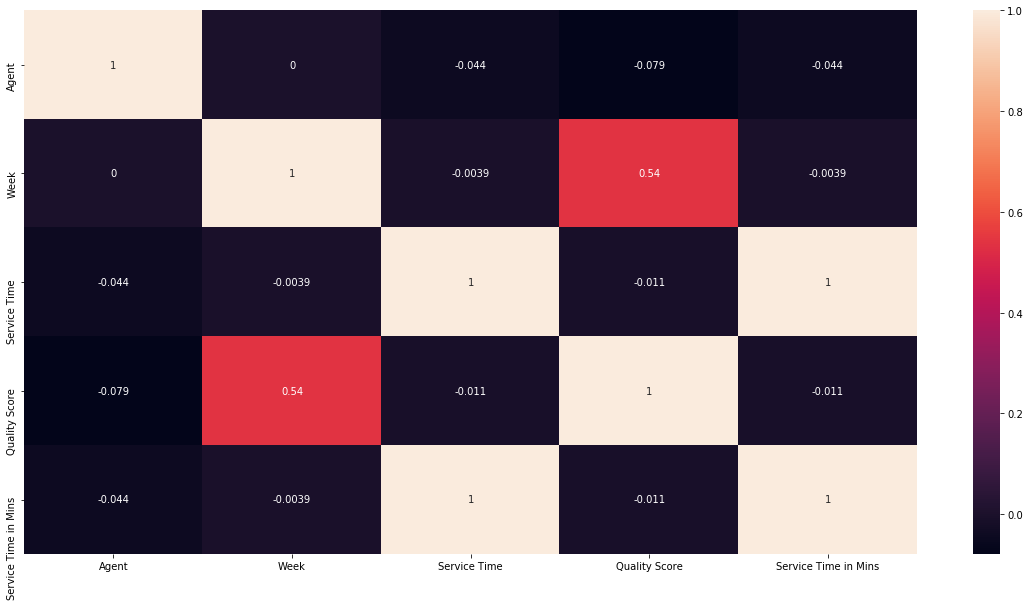

In [38]:
#Code for drawing a heatmap using seaborn
plt.figure(figsize=(20,10))
heat_map= my_data.corr()
sns.heatmap(heat_map,annot=True)
heat_map

Well, out of the quantitave variables, we can see that there's a good strong correlation between the week and the quality score! We will investigate this soon.

## Relationships of features with Quality Score!

Let us explore and find out if there's anything that we find here! Then, we can find out the things we could focus on to get us an improvement.

In [39]:
#Grouping Average Quality Score by Site

Site_QS = my_data[["Site", "Quality Score"]].groupby(['Site'], as_index=False).mean().sort_values(by='Quality Score', ascending=False)
Site_QS

,Site,Quality Score
1,North,7.037382
0,East,6.933632
2,South,6.714882


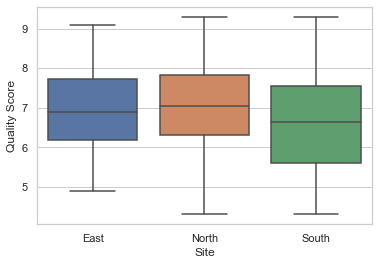

In [40]:
#Visualizing boxplots the above table
sns.set(style="whitegrid")
ax = sns.boxplot(x="Site", y="Quality Score", data=my_data)

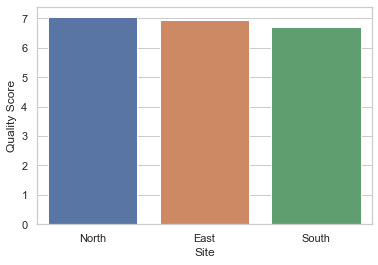

In [41]:
#Barplots for the above table
sns.set(style="whitegrid")
ax = sns.barplot(x="Site", y="Quality Score", data=Site_QS)

Well, this does not tell us much except for the fact that average quality score for South is a little less than the other sites. So we can proceed with the other features!

In [42]:
#Grouping Average Quality Score by Client

Client_QS = my_data[["Client", "Quality Score"]].groupby(['Client'], as_index=False).mean()
Client_QS

,Client,Quality Score
0,A,7.404922
1,B,6.385677


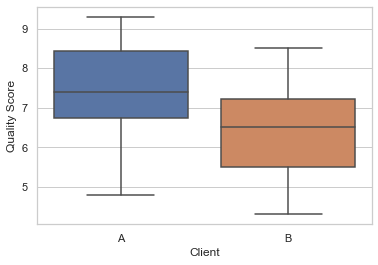

In [43]:
#Boxplots for the above table
sns.set(style="whitegrid")
ax = sns.boxplot(x="Client", y="Quality Score", data=my_data)

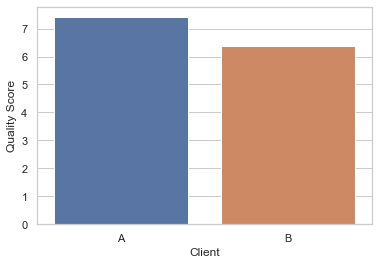

In [44]:
#Barplots for the above table

sns.set(style="whitegrid")
ax = sns.barplot(x="Client", y="Quality Score", data=Client_QS)

Well, the Quality Score for client B is much lower than A. Let us have a look at the supervisors that handle these respective clients.

In [45]:
#Grouping Quality Score by Client then Supervisor.

Client_Supervisor_QS = my_data[['Client',"Supervisor", "Quality Score"]].groupby(['Client','Supervisor'], as_index=True).mean().sort_values(by='Quality Score', ascending=False)
Client_Supervisor_QS

Quality Score
Client Supervisor               
A      Kathy            7.750000
       John             7.609765
       Andrew           7.415000
       David            7.385000
       Brian            7.144765
       Jorge            7.125000
B      Sarah            6.754765
       George           6.710000
       Samantha         6.434765
       Eric             6.355000
       Julie            6.045000
       Michael          6.014530

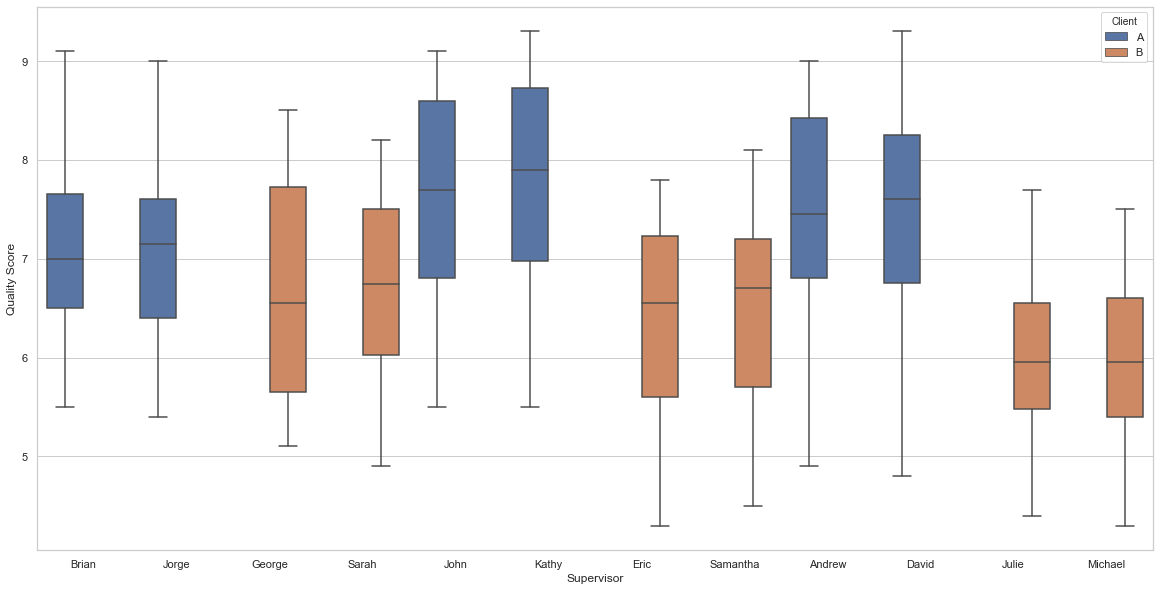

In [46]:
#Boxplots for the above table

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.boxplot(x="Supervisor", y="Quality Score",hue='Client', data=my_data)

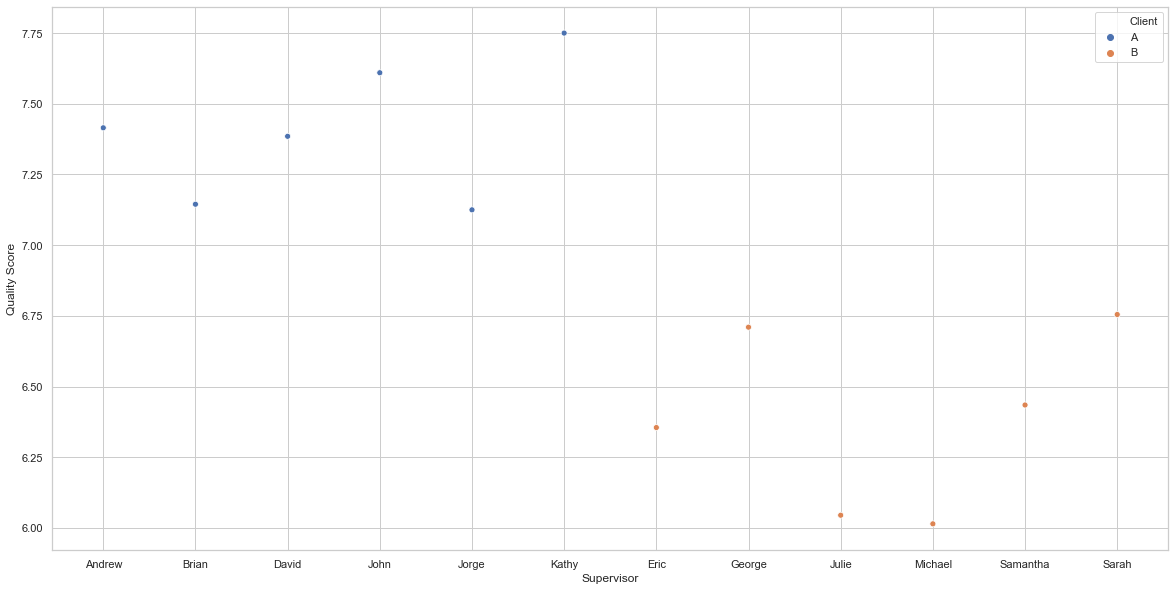

In [47]:
#Scatterplot for the above table with hue as client.

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.scatterplot(x='Supervisor', y="Quality Score", hue = 'Client',data=my_data[['Client',"Supervisor", "Quality Score"]].groupby(['Client','Supervisor'], as_index=False).mean())

Well, we should investigate why the quality scores for supervisors handling Client B are so low. Quality Score for supervisors handling Client A look considerably near the mean but for B, they're far below. This can be one point to note down! We need to sit with Michael, Julie, Eric, etc to understand what's going wrong.

Now let us see the Quality Score on the agent level and figure out the ones that need to be addressed.


In [48]:
#Grouping Quality Score by Agent then Supervisor

A_G_QS = my_data[['Agent',"Supervisor", "Quality Score"]].groupby(['Agent','Supervisor'], as_index=True).mean().sort_values(by='Quality Score', ascending=False)
A_G_QS.head(10)  #Top 10 Performers in terms of Quality Score 


,,Quality Score
Agent,Supervisor,
25,Kathy,8.30000
1,John,8.24000
35,David,7.98000
26,Kathy,7.90000
11,Andrew,7.88000
18,Jorge,7.78000
28,Kathy,7.72000
2,John,7.72000
4,John,7.64000


In [49]:
A_G_QS.tail(10)  #Top 10 Underperformers in terms of Quality Score

,,Quality Score
Agent,Supervisor,
6,Samantha,6.26000
30,Eric,6.18000
13,Michael,6.17906
37,Julie,6.00000
7,Samantha,6.00000
38,Julie,5.96000
31,Eric,5.92000
14,Michael,5.90000
40,Julie,5.50000


Well, Agent 25 and 1 are doing really well! Good job! 

Also, we can identify the underperformers here. We now know which agents to address and the supervisors to reach out to. This is another point to note down!

Now, we had earlier come up with an observation that week and quality score are highly correlated (0.54). That is the strongest correlation that we've got. Well let us investigate.

In [50]:
#Grouping Quality Score by Week

Week_QS = my_data[["Week", "Quality Score"]].groupby(['Week'], as_index=False).mean()
Week_QS

,Week,Quality Score
0,1,6.287402
1,2,6.039583
2,3,6.808235
3,4,7.485221
4,5,7.856054


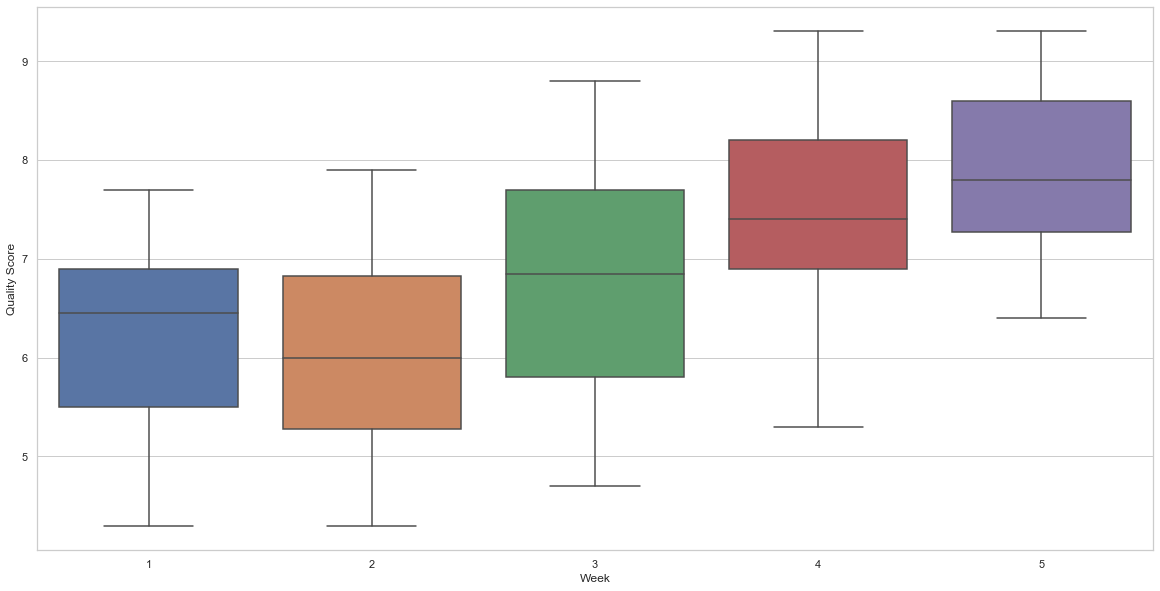

In [51]:
#Boxplots to visualize above table

plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.boxplot(x="Week", y="Quality Score", data=my_data)

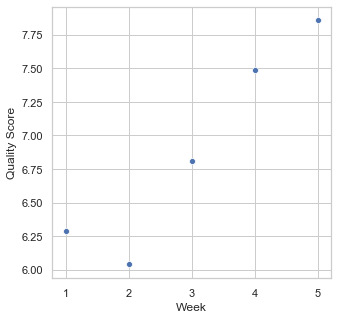

In [53]:
#Scatterplots to visualize trend as weeks go by

plt.figure(figsize=(5,5))
sns.set(style="whitegrid")
ax = sns.scatterplot(x='Week', y="Quality Score",data = Week_QS)

Well, we are on to something. You can see there's a postive relationship between Quality Score and Weeks. As the weeks increase, the Quality Score increases too, excluding the transition from Week 1 to Week 2. There needs to be investigation by the business in order to figure out the reason for such a trend. But what is the reason for  a decrease from Week 1 to Week 2? Let us see the Supervisors responsible for it!

In [54]:
#Grouping Quality Score by Supervisor for both weeks 1 and 2 separately to see difference.

Week_QS = my_data[["Supervisor",'Week','Quality Score']].groupby(['Supervisor','Week'], as_index=False).mean()
Week_QS = Week_QS[(Week_QS['Week'] == 1) | (Week_QS['Week'] == 2)]
Week_QS[Week_QS['Week']==1]

,Supervisor,Week,Quality Score
0,Andrew,1,7.150000
5,Brian,1,6.925000
10,David,1,7.175000
15,Eric,1,6.150000
20,George,1,5.575000
25,John,1,6.375000
30,Jorge,1,6.900000
35,Julie,1,5.300000
40,Kathy,1,6.400000
45,Michael,1,5.150000


In [55]:
Week_QS[Week_QS['Week']==2]

,Supervisor,Week,Quality Score
1,Andrew,2,5.725
6,Brian,2,6.550
11,David,2,5.600
16,Eric,2,5.050
21,George,2,5.750
26,John,2,7.250
31,Jorge,2,6.550
36,Julie,2,5.825
41,Kathy,2,7.350
46,Michael,2,5.825


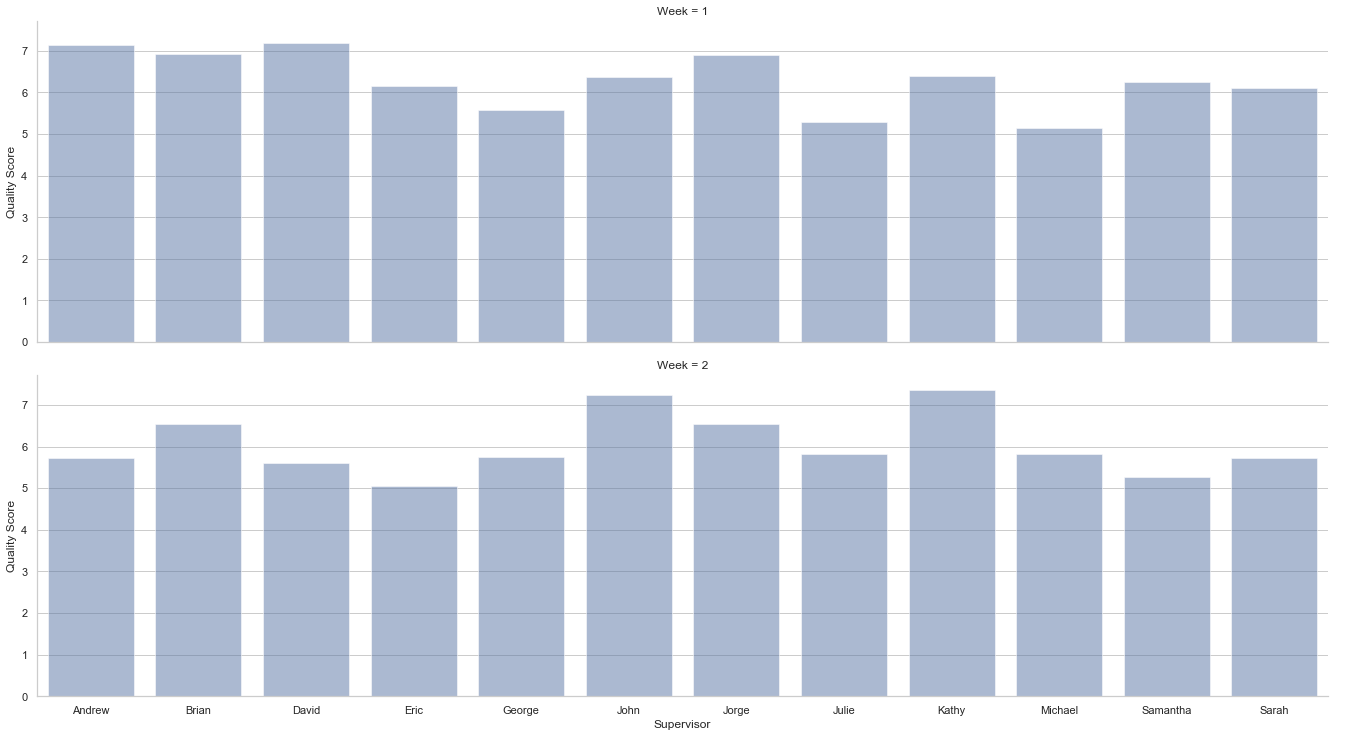

In [57]:
#Visualizing the change in average Quality Score every week for each supervisor.

grid = sns.FacetGrid(Week_QS, row='Week', size=5.2, aspect=3.6)
grid.map(sns.barplot, 'Supervisor', 'Quality Score', alpha=.5, ci=None)
grid.add_legend()

There's a pattern that we can see. That for majority of the supervisors, the average Quality Score for Week 2 decreases from Week1. That is no coincidence! Need to inform the business to investigate what's going wrong during Week 2.

So we're mostly done analyzing the relationships of the features with Quality Score! Now let us do some analyzing using the Service Time!


## Relationships of features with Service Time!

Let us explore and find out if there's anything that we find any important relationships here! Then, we can find out the things we could focus on to get us an improvement.

In [58]:
#Grouping avg Service Time by Site

Site_ST = my_data[["Site", "Service Time"]].groupby(['Site'], as_index=False).mean().sort_values(by='Service Time', ascending=False)
Site_ST

,Site,Service Time
2,South,510.067208
0,East,460.468777
1,North,454.840639


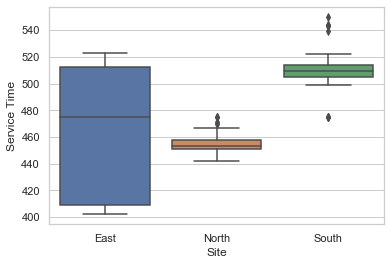

In [59]:
#Boxplots for the above table
sns.set(style="whitegrid")
ax = sns.boxplot(x="Site", y="Service Time",data=my_data)

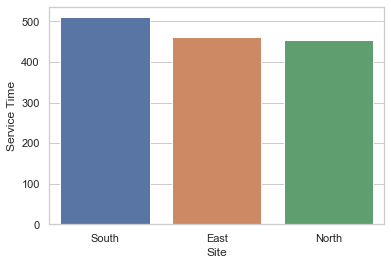

In [60]:
#Barplots for the above table
sns.set(style="whitegrid")
ax = sns.barplot(x="Site", y="Service Time", data=Site_ST)

Here, we observe that the service time is much less for East and North sites, as compared to South sites. This could be put forward to the business for further investigation as to what could be the reason for higher servie time in South. Also, the range/variation for East site is too high as compared to the others. Definitely worth looking into!

Now we could check the Service Time based on the clients!

In [61]:
#Group avg Service Time by Client

Client_ST = my_data[['Client',"Service Time"]].groupby(['Client'], as_index=False).mean()
Client_ST

,Client,Service Time
0,A,491.981277
1,B,458.269805


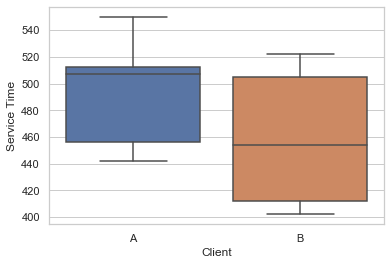

In [62]:
#Boxplots to visualize above table
sns.set(style="whitegrid")
ax = sns.boxplot(x="Client", y="Service Time",data=my_data)

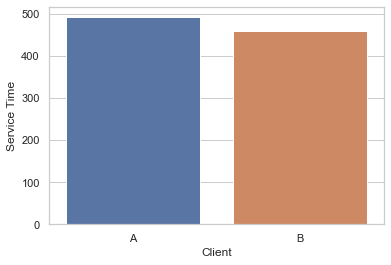

In [63]:
#Barplots to visualize above table
sns.set(style="whitegrid")
ax = sns.barplot(x="Client", y="Service Time", data=Client_ST)

Well, Client B has a considerable lower Service Time than A. There could be reasons why that could be. Let's see how clients and sites could tell us more!

In [64]:
#Grouping avg Service Time by Site and then Client
Client_ST = my_data[['Site','Client',"Service Time"]].groupby(['Site','Client'], as_index=False).mean()
Client_ST

,Site,Client,Service Time
0,East,A,510.559416
1,East,B,410.378139
2,North,A,454.428139
3,North,B,455.253139
4,South,A,510.956277
5,South,B,509.178139


In [65]:
my_data[['Site','Client',"Service Time"]].groupby(['Client','Site'], as_index=False).mean()

,Client,Site,Service Time
0,A,East,510.559416
1,A,North,454.428139
2,A,South,510.956277
3,B,East,410.378139
4,B,North,455.253139
5,B,South,509.178139


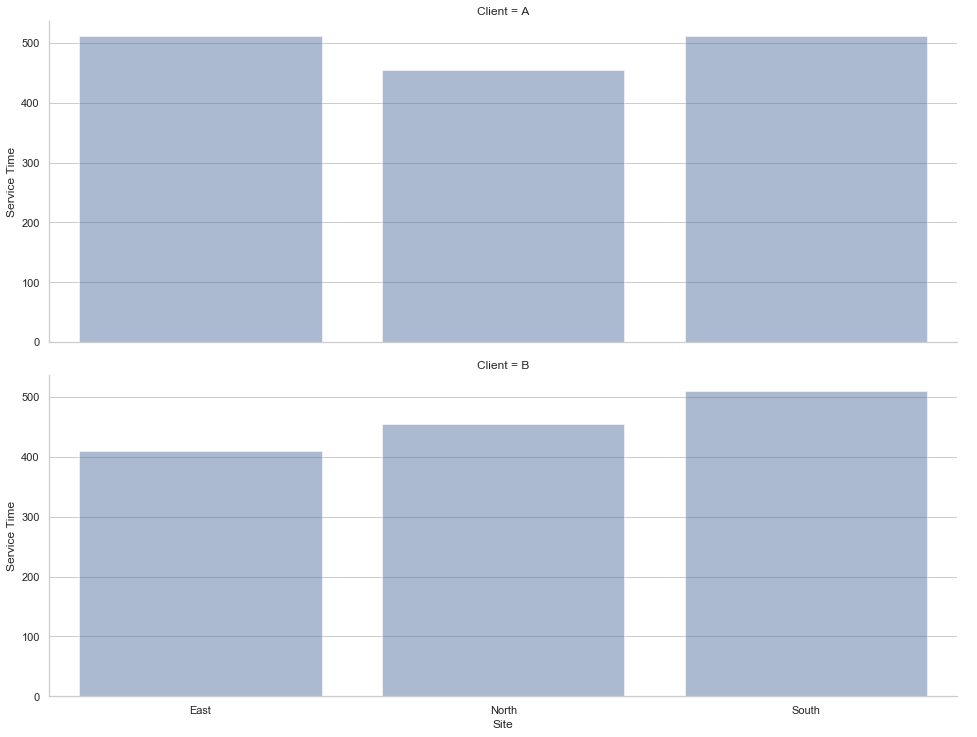

In [97]:
#Visualizing avg Service Time for each site given different clients

grid = sns.FacetGrid(Client_ST, row='Client', size=5.2, aspect=2.6)
grid.map(sns.barplot, 'Site', 'Service Time', alpha=.5, ci=None)
grid.add_legend()

So, one key observation is that the Service Time remains the same for Clients A and B when it comes to the North and South Sites. But when serving different clients in the East site, it differs drastically.

Also, from the second table, we see that the service time changes a lot when serving customers from the same client B but different sites. Something to note down!

In [67]:
#Grouping Service Time by Supervisor in decreasing order of Service Time

Client_Supervisor_ST = my_data[["Supervisor", "Service Time"]].groupby(['Supervisor'], as_index=False).mean().sort_values(by='Service Time', ascending=False)
Client_Supervisor_ST

,Supervisor,Service Time
0,Andrew,515.656277
6,Jorge,511.606277
7,Julie,511.200000
1,Brian,509.512554
9,Michael,507.156277
2,David,506.256277
3,Eric,455.906277
5,John,455.356277
10,Samantha,454.600000
8,Kathy,453.500000


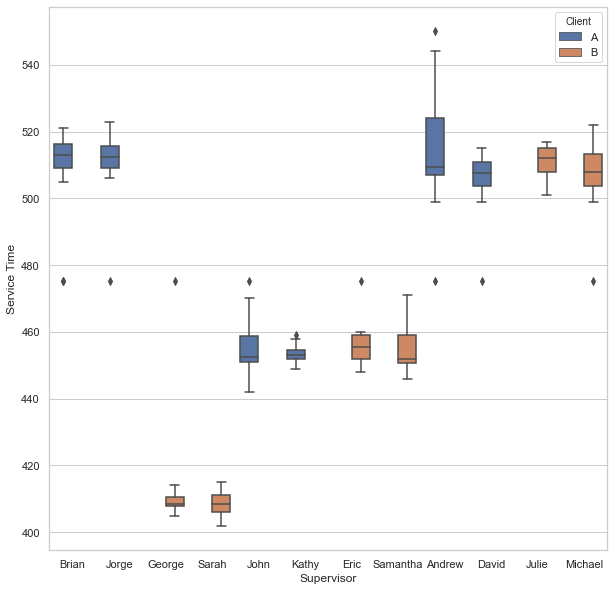

In [68]:
#Boxplots to show the above table
sns.set(style="whitegrid")
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Supervisor", y="Service Time",hue='Client',data=my_data)

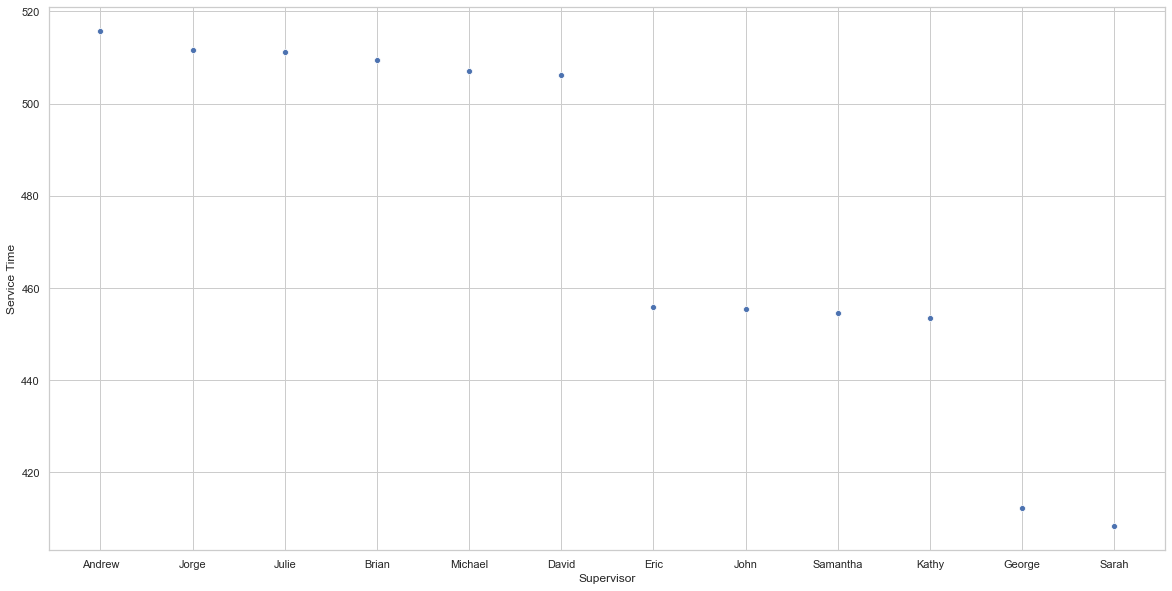

In [69]:
#Barplots to show the above table
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
ax = sns.scatterplot(x='Supervisor', y="Service Time",data= Client_Supervisor_ST)

Well, we see that agents working under say Andrew, Jorge have high service times as compared to say Sarah and Gorge. So, the business could look into these supervisors regarding why their service times are so high. Now let us see the Service Time on the agent level and figure out the ones that need to be addressed.

In [70]:
#Grouping avg Service Time by Agent then Supervisor in decreasing order of Service Time.

A_G_ST = my_data[['Agent',"Supervisor", "Service Time"]].groupby(['Agent','Supervisor'], as_index=True).mean().sort_values(by='Service Time', ascending=False)
A_G_ST.head(10)

,,Service Time
Agent,Supervisor,
10,Andrew,544.0
17,Jorge,521.2
43,Brian,518.4
13,Michael,517.4
42,Brian,514.0
38,Julie,513.4
19,Jorge,512.8
40,Julie,512.4
9,Andrew,512.4


In [71]:
A_G_ST.tail(10).sort_values('Service Time')

,,Service Time
Agent,Supervisor,
22,Sarah,404.200000
46,George,406.600000
21,Sarah,406.800000
47,George,409.600000
23,Sarah,411.400000
45,George,411.400000
24,Sarah,411.600000
48,George,421.425108
1,John,451.600000


Well, Agents like 10 and 17 have a really high service time! Investigation needs to be done as to why!

Also, we can identify the good performers here like Sarah and George here, the ones which have such low service time. We now know which agents to address and the supervisors to reach out to. This is another point to note down!

Let us look into a potential relationship between week and service time.

In [72]:
#Group Service Time by Week

Week_ST = my_data[["Week","Service Time"]].groupby(['Week'], as_index=False).mean()
Week_ST

,Week,Service Time
0,1,475.026064
1,2,476.487013
2,3,474.356782
3,4,474.065115
4,5,475.692731


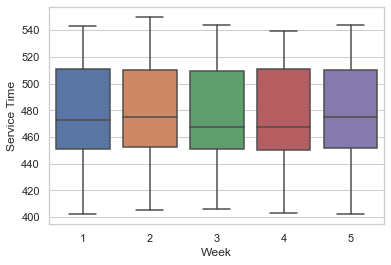

In [73]:
#Boxplots to show the above table

sns.set(style="whitegrid")
ax = sns.boxplot(x="Week", y="Service Time",data=my_data)

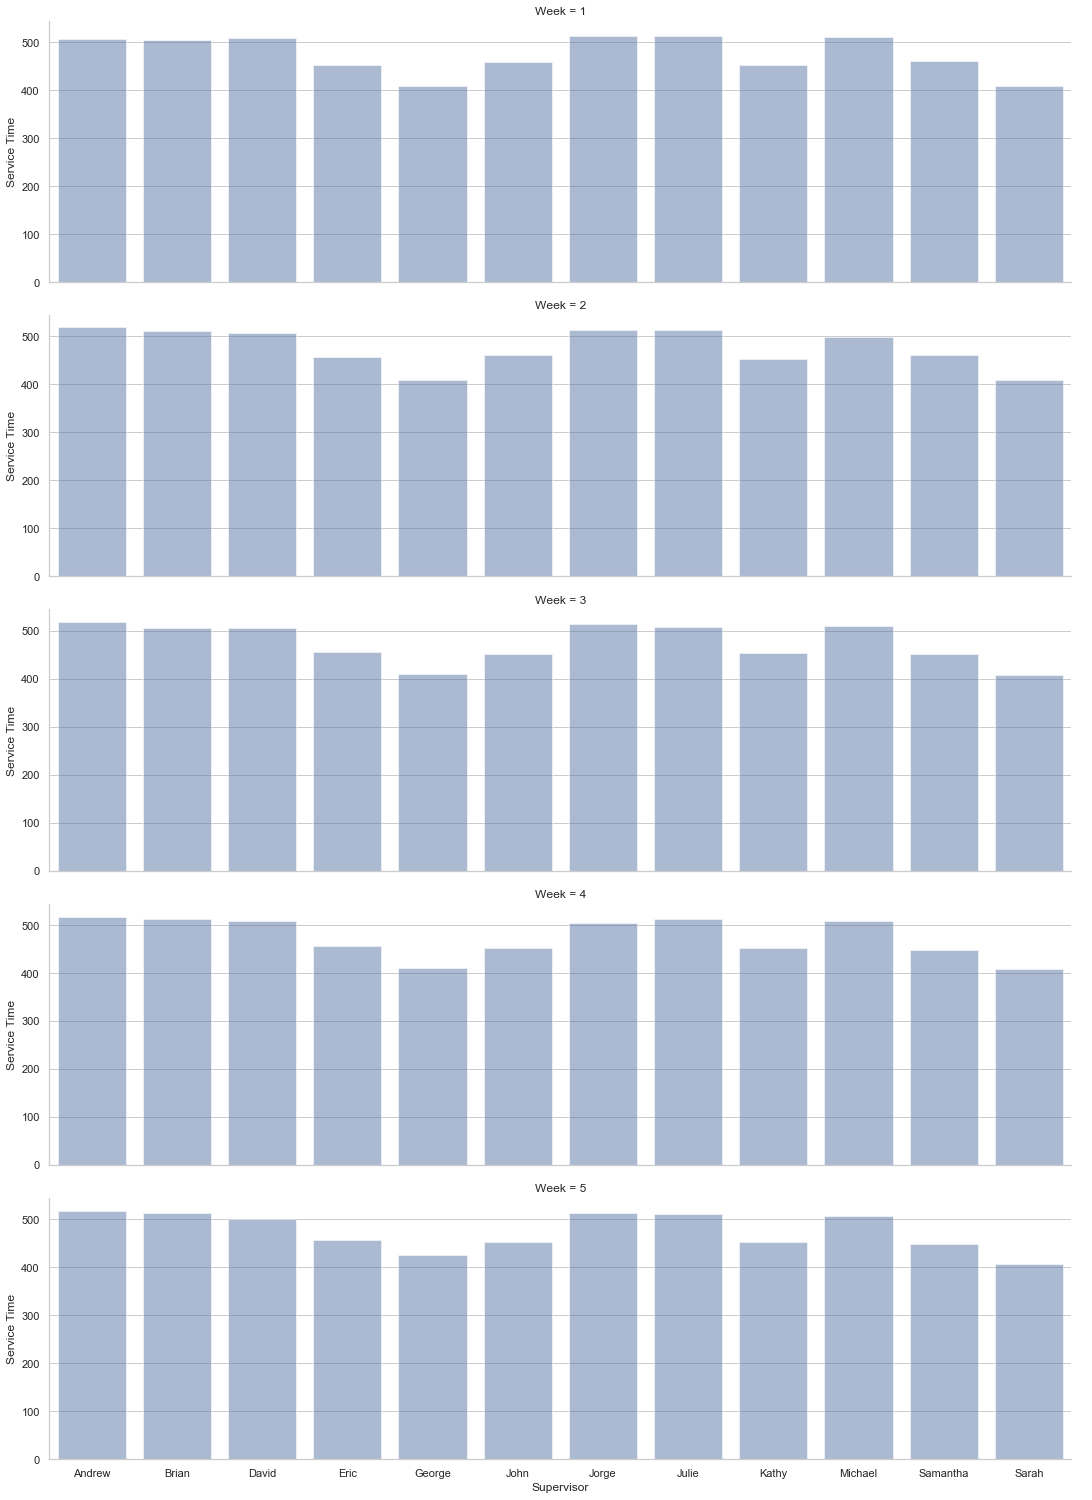

In [98]:
#Visualizing avg Service Time given different weeks for specific supervisors.

Week_ST = my_data[["Week","Service Time",'Supervisor']].groupby(['Week','Supervisor'], as_index=False).mean()
grid = sns.FacetGrid(Week_ST, row='Week', size=4.2, aspect=3.6)
grid.map(sns.barplot, 'Supervisor', 'Service Time', alpha=.5, ci=None)
grid.add_legend()

Well, this isn't very informative but we know that the average service time across weeks is roughly the same.
So that's it for analyzing relationships with Service Time and other features. As per the correlation plot, we didn't find much of a correlation between Service Time and any of the features. 

#### So far, we used data wrangling and visualizations, to analyze the relationship of the features. Let's try something like a variable selection technique which may tell us the important features that maybe we couldn't figure so far! 

# Feature Importances to establish relationships!

Before we can start, we need to encode the categorical values into digits. We can use label encoder for this case. But the problem that we create is that it would consider say 2>1 wherein that's not true for a categorical variable which isn't ordered. But for the sake of convenience and also that some of the categorical variables have a lot of levels, we will stick to label encoding!

There are different ways of feature selection. You could subset selection, shrinkage methods(Lasso) or even dimensionality reduction. But because, we've done label encoding, the best method would be to use feature importances from tree classifiers, as they are not affected by ordinality much.

In [1]:
#Encoding the categorical features into numerical digits

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
my__data = my_data.copy()
my__data['Site'] = enc.fit_transform(my__data['Site'])
my__data['Client'] = enc.fit_transform(my__data['Client'])
my__data['Supervisor'] = enc.fit_transform(my__data['Supervisor'])
my__data.head()

NameError: name 'my_data' is not defined

Great! Now let us just see the correlation table for the variables before we actually start with the feature importances techniques!

## 1. Correlation - Heat Map Plot

,Site,Client,Supervisor,Agent,Week,Service Time,Quality Score,Service Time in Mins
Site,1.000000,0.000000,-0.118262,-0.235753,0.000000,0.513717,-0.074154,0.513717
Client,0.000000,1.000000,0.531085,0.144369,0.000000,-0.427641,-0.423167,-0.427641
Supervisor,-0.118262,0.531085,1.000000,-0.313659,0.000000,-0.405929,-0.187928,-0.405929
Agent,-0.235753,0.144369,-0.313659,1.000000,0.000000,-0.043929,-0.078631,-0.043929
Week,0.000000,0.000000,0.000000,0.000000,1.000000,-0.003906,0.538174,-0.003906
Service Time,0.513717,-0.427641,-0.405929,-0.043929,-0.003906,1.000000,-0.010602,1.000000
Quality Score,-0.074154,-0.423167,-0.187928,-0.078631,0.538174,-0.010602,1.000000,-0.010602
Service Time in Mins,0.513717,-0.427641,-0.405929,-0.043929,-0.003906,1.000000,-0.010602,1.000000


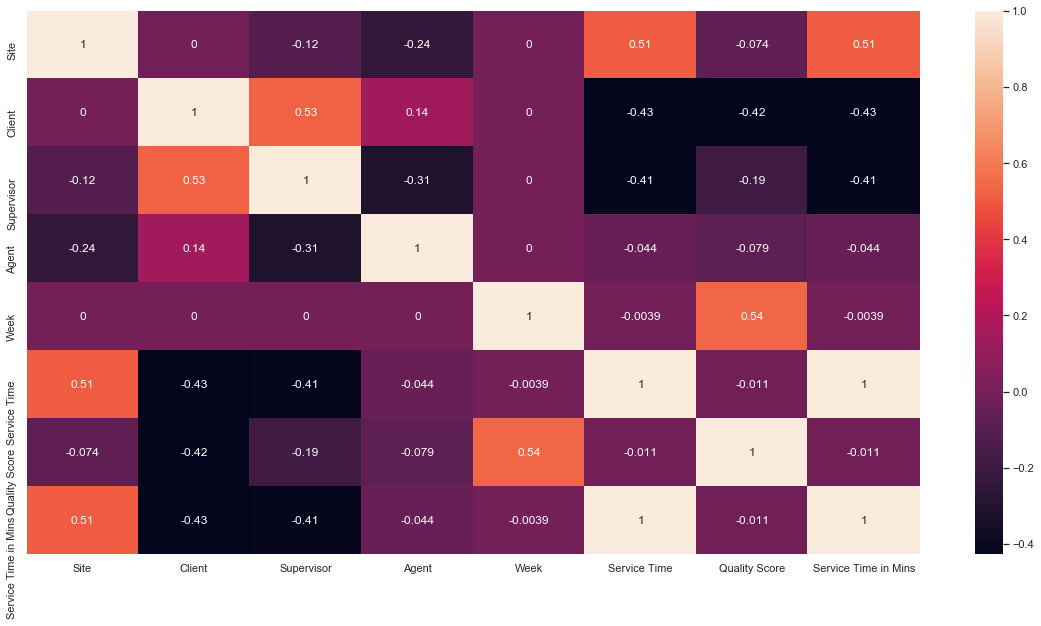

In [76]:
#Code for drawing a heatmap using seaborn
plt.figure(figsize=(20,10))
heat_map= my__data.corr()
sns.heatmap(heat_map,annot=True)
heat_map

Well, now we see something different. Now we see that Quality Score has quite a negative correlation with Client as well which wasn't observed before. Also, Service Time has correlations with Site, Client and Supervisor which wasn't seen before! Let's further investigate with other feature importance methods! 

## 2. Feature Importance using Tree-Based Method

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

###### Features important for Quality Score (ExtraTreesRegressor)

[(0.3605, 'Week'), (0.35, 'Agent'), (0.1795, 'Client'), (0.0959, 'Site'), (0.0142, 'Supervisor')]


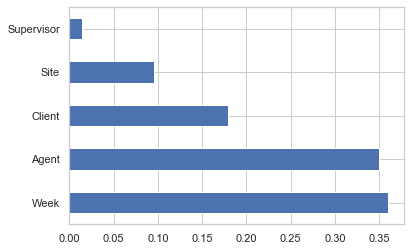

In [77]:
#Using ExtraTreeRegressor to find the most important features with respect to Quality Score


X = my__data.iloc[:,0:5]
Y = my__data.iloc[:,6]

#X=X.astype(int)
#Y = Y.astype(int)

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(criterion = 'mse',n_estimators = 300)
model.fit(X,Y)
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), X.columns),reverse=True))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

###### Features important for Service Time (ExtraTreesRegressor)

[(0.6205, 'Site'), (0.2179, 'Client'), (0.0844, 'Supervisor'), (0.0553, 'Agent'), (0.0219, 'Week')]


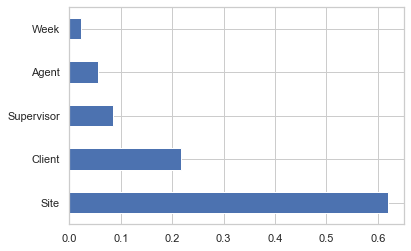

In [78]:
#Using ExtraTreeRegressor to find the most important features with respect to Service Time.


X = my__data.iloc[:,0:5]
Y = my__data.iloc[:,5]

#X=X.astype(int)
#Y = Y.astype(int)
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(criterion='mse',n_estimators = 300)
model.fit(X,Y)
print(sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), X.columns), reverse=True))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

So, the most important features for both Quality Score are Agent and Week. It does make sense a bit because the metrics are directly associated with agents and could differ from week to week given how they're performing!

The most important features for Service Time are Client and Site. This does make sense to an extent as your service time is directly dependent on the customers you're serving and the site they're at. 


Let's confirm what we saw with other tree based methods!

###### Features important for Quality Score (RandomForestRegressor)

[(0.4086, 'Week'), (0.2898, 'Agent'), (0.1759, 'Client'), (0.0792, 'Site'), (0.0465, 'Supervisor')]


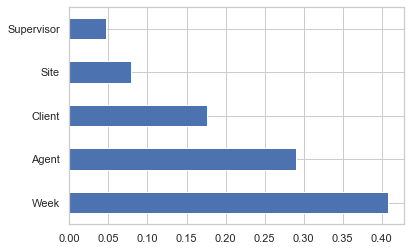

In [94]:
#Using RandomForestRegressor to find the most important features with respect to Quality Score
X = my__data.iloc[:,0:5]
Y = my__data.iloc[:,6]


from sklearn.ensemble import RandomForestRegressor
regressorRandom=RandomForestRegressor(criterion='mse',n_estimators = 300)
regressorRandom.fit(X,Y)
sorted(zip(map(lambda x: round(x, 4), regressorRandom.feature_importances_), X.columns), 
             reverse=True)
print(sorted(zip(map(lambda x: round(x, 4), regressorRandom.feature_importances_), X.columns),reverse=True))
feat_importances = pd.Series(regressorRandom.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

###### Features important for Service Time (RandomForestRegressor)

[(0.6431, 'Site'), (0.2489, 'Client'), (0.0573, 'Agent'), (0.0292, 'Supervisor'), (0.0215, 'Week')]


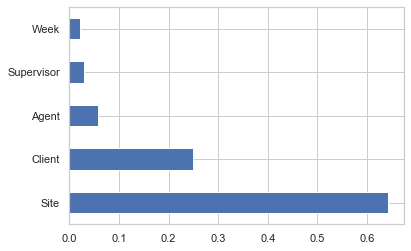

In [95]:
#Using RandomForestRegressor to find the most important features with respect to Service Time

X = my__data.iloc[:,0:5]
Y = my__data.iloc[:,5]


from sklearn.ensemble import RandomForestRegressor
regressorRandom=RandomForestRegressor(criterion='mse',n_estimators = 300)
regressorRandom.fit(X,Y)
sorted(zip(map(lambda x: round(x, 4), regressorRandom.feature_importances_), X.columns), 
             reverse=True)
print(sorted(zip(map(lambda x: round(x, 4), regressorRandom.feature_importances_), X.columns),reverse=True))
feat_importances = pd.Series(regressorRandom.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

This gives us the same results as we saw before! We're on the right track!

## Machine Learning Opportunities!

##### We could make use of Machine Learning techniques to think of two great opportunities:

1. Predicting the future Quality Scores/Service Time in advance on the basis of first week performance to address adjustments and better approaches to improve these metrics for the coming weeks.

2. Clustering the bad performing agents from the good ones based on the week, after the consecutive 5 weeks, to address individual agent underperformances.

### Opportunity 1. Prediction of metrics!

Here, what I'm going to do is prepare a train file which only has data for the first week. My test file will have data from the remaining. I will train my model on the train file and predict the metrics for the coming weeks. That is the objective!

1. Predicting Quality Score

In [81]:
#Creating train and test data sets for this scenario

X = my__data.iloc[:,0:5]

X_train = X[X['Week'] == 1]
X_test = X[X['Week'] != 1]


Y_train = my__data[my__data['Week'] == 1]
Y_train = Y_train['Quality Score']
Y_test = my__data[my__data['Week'] != 1]
Y_test = Y_test['Quality Score']

In [82]:
#Using RandomForestRegressor to predict values of Quality Score

from sklearn.ensemble import RandomForestRegressor
regressorRandom=RandomForestRegressor()
regressorRandom.fit(X_train,Y_train)
Y_pred1=regressorRandom.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_pred1,Y_test)

1.2186200587606848

2. Predicting Service Time

In [89]:
#Creating train and test data sets for this scenario
X = my__data.iloc[:,0:5]

X_train = X[X['Week'] == 1]
X_train = X_train.iloc[:,0:2]
X_test = X[X['Week'] != 1]
X_test = X_test.iloc[:,0:2]

Y_train = my__data[my__data['Week'] == 1]
Y_train = Y_train['Service Time']
Y_test = my__data[my__data['Week'] != 1]
Y_test = Y_test['Service Time']

In [84]:
#Using RandomForestRegressor to predict values of Service Time


from sklearn.ensemble import RandomForestRegressor
regressorRandom=RandomForestRegressor()
regressorRandom.fit(X_train,Y_train)
Y_pred1=regressorRandom.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_pred1,Y_test)

6.195427913924971

Well, the mean absolute errors are very low. So we've done a good job in predictions. I could have used a time series model or lasso regression (as it performs variable selection) but random forest regressor also does feature selection and is not affected by encoded nominal categorical values, so it's a good choice!

We can use these predictions to good use and prepare strategies in advance!

### Opportunity 2.  Clustering of Agents!

My idea was to basically cluster agents say for my example below, according to service time so as to find clusters depending on how much service time they take. So, the ones taking a lot of service time could be investigated further for the reasons behind it. So below, I've just shown a quick example of how clustering can be useful.

In [85]:
#Using K-Means clustering on Agent and Service Time to cluster each agent having similar service times

from sklearn.cluster import KMeans
x=my_data[['Agent',"Service Time"]].groupby(['Agent'], as_index=False).mean().sort_values(by='Agent', ascending=True)
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
y_kmeans = kmeans.predict(x)

In [86]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0], dtype=int32)

Text(0, 0.5, 'Service Time')

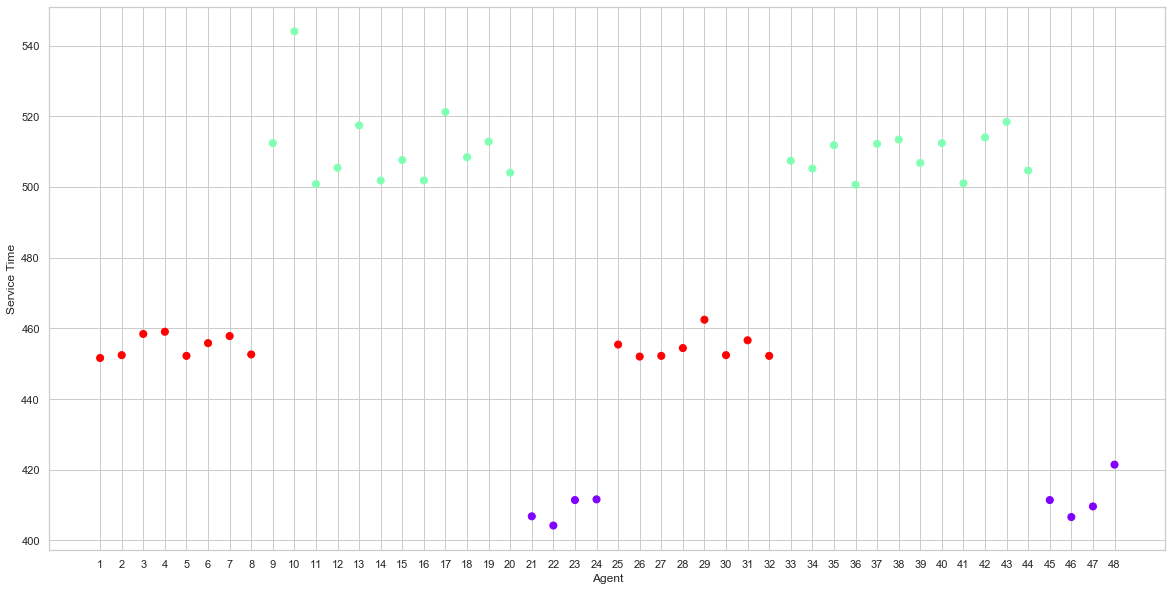

In [100]:
#Visualizing the clusters

plt.figure(figsize=(20,10))
plt.scatter(x['Agent'].sort_values().astype('str'), x['Service Time'], c=y_kmeans, s=50, cmap='rainbow')
plt.xlabel("Agent")
plt.ylabel('Service Time')

From what I can see, I can divide them into three clusters:

    1. Aqua - The agents with the highest average service times.
    2. Red - The agents with mean average service times.
    3. Violet - The agents with lowest average service times.

This way, we can dig deeper and investigate these agents based on the given clusters!